# Assignmnet 1 (100 points)

**Name:** Alexander Vaptsarov <br>
**Email:** alv3651@thi.de <br>
**Group:** A<br>
**Hours spend *(optional)* :** around 2 days (48h) <br>

### Question 1: Zipf’s law *(20 points)*

Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice).

Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings.

In [110]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_zipf(corpus):
    words = re.findall(r'\b(?![0-9]+\b)\w+\b', corpus.lower())
    
    word_count = {}
    for word in words:
        count = word_count.get(word,0) # get the current count for each word, else return 0
        word_count[word] = count + 1

    sorted_words = sorted(word_count.items(), key=lambda value: value[1], reverse=True)
    total_words = len(words)
    
    # probabilities = [(word, freq / total_words) for word, freq in sorted_words]
    # constants = [(rank + 1) * prob for rank, (word, prob) in enumerate(probabilities)]

    df = pd.DataFrame(sorted_words, columns=['Word', 'Frequency'])
    df['Rank'] = df.index + 1
    # df['Probability'] = df['Frequency'] / total_words
    # df['Constant'] = constants
    
    return df 

with open("jungle_book.txt") as file:
    corpus = file.read()

zipf_df = calculate_zipf(corpus)
# zipf_df['Frequency'][0]
# # 3730 * 0.2

ploting the linear-linear and a log-log curve:

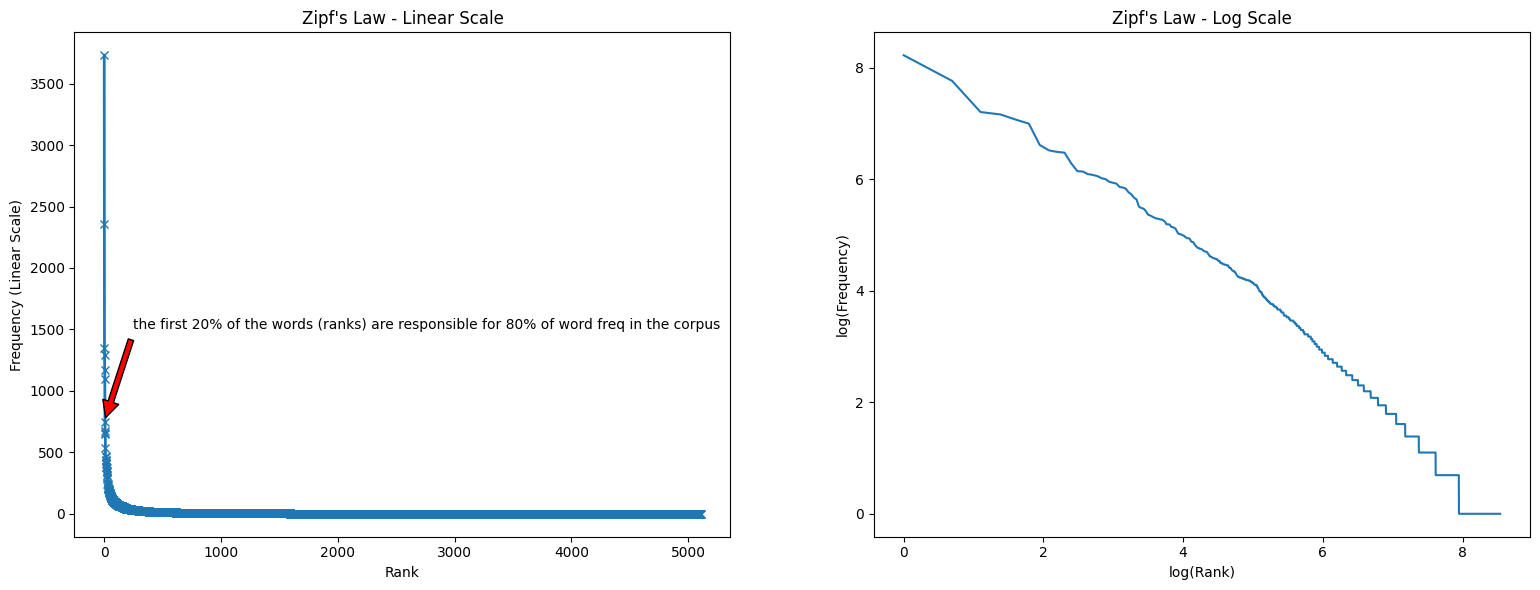

In [111]:
n = None # how many samples to visualize (None means all of the)
fig, axs = plt.subplots(1, 2, figsize=(15.5, 6))

axs[0].annotate('the first 20% of the words (ranks) are responsible for 80% of word freq in the corpus', xy=(zipf_df['Rank'][0] * 0.2, zipf_df['Frequency'][0] * 0.2), xytext=(250, 1500),
             arrowprops=dict(facecolor='red', shrink=0.05))

axs[0].plot(zipf_df['Rank'][:n], zipf_df['Frequency'][:n], marker='x', linewidth=2) # Linear curve
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Frequency (Linear Scale)')
axs[0].set_title("Zipf's Law - Linear Scale")

axs[1].plot(np.log(zipf_df['Rank']), np.log(zipf_df['Frequency'])) # Log scale
axs[1].set_xlabel('log(Rank)')
axs[1].set_ylabel('log(Frequency)')
axs[1].set_title("Zipf's Law - Log Scale")

plt.tight_layout()
plt.show()

# the plot indicates that a few words occur very frequently, 
# while the majority of words occur very rarely (momst of them only once). 
# This is a common pattern in natural language corpora,
# reflecting the distribution of common and rare words (types).

### Question 2: Mutual Information *(30 points)*

<p>Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. </p>

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. If needed, you can use nltk library. </p>

In [112]:
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import numpy as np
import math

with open("jungle_book.txt") as file:
    corpus = file.read()

tokens = nltk.word_tokenize(corpus)
freq_dist = FreqDist(tokens)
vocab = [word for word, freq in freq_dist.items() if freq >= 10]

co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

word_to_index = {word: i for i, word in enumerate(vocab)}

for i in range(len(tokens) - 1):
    word1, word2 = tokens[i], tokens[i+1]
    if word1 in vocab and word2 in vocab:
        co_occurrence_matrix[word_to_index[word1]][word_to_index[word2]] += 1

pmi_scores = {}
for i, word1 in enumerate(vocab):
    for j, word2 in enumerate(vocab):
        joint_prob = co_occurrence_matrix[i][j] / len(tokens)
        pmi_denominator = (freq_dist[word1] / len(tokens)) * (freq_dist[word2] / len(tokens))
        if pmi_denominator != 0 and joint_prob != 0:
            pmi = math.log2(joint_prob / pmi_denominator)
            pmi_scores[(word1, word2)] = pmi

sorted_pmi = sorted(pmi_scores.items(), key=lambda x: x[1], reverse=True)

top_30 = sorted_pmi[:30]
bottom_30 = sorted_pmi[-30:]

print("Top 30 word pairs with highest PMI values:")
for pair, pmi_value in top_30:
    print(pair, pmi_value)

print("\nBottom 30 word pairs with lowest PMI values:")
for pair, pmi_value in bottom_30:
    print(pair, pmi_value)
# co_occurrence_matrix

Top 30 word pairs with highest PMI values:
('United', 'States') 12.700916491678946
('Machua', 'Appa') 12.563412967929011
('Literary', 'Archive') 12.322404868425215
('Black', 'Panther') 11.978450467207855
('LITTLE', 'TOOMAI') 11.630527163787548
('Archive', 'Foundation') 11.437882085845152
('Of', 'course') 11.370767889986615
('Gutenberg', 'Literary') 11.26795708440284
('Two', 'Tails') 11.164863591438735
('Petersen', 'Sahib') 10.893561569621342
('SAID', 'LITTLE') 10.852919585123995
('Council', 'Rock') 10.827384493016858
('*', '*') 10.80045216522986
('Gray', 'Brother') 10.774917073122722
('hind', 'legs') 10.675381399571808
('twenty', 'yoke') 10.563412967929011
('fore', 'paws') 10.563412967929011
('hind', 'flippers') 10.530991490236634
('O', 'Wolves') 10.452988978235359
('Sea', 'Cow') 10.4081347424511
("'", 'SAID') 10.408134742451098
('Sea', 'Catch') 10.408134742451098
('Sea', 'Vitch') 10.408134742451098
('UP', 'HIS') 10.378988396791582
('Free', 'People') 10.350419244594812
('whole', 'line'

### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements. Finally, compare the performance of the language model with and without Backoff.</p>

<p> You cannot use any Python libraries like NLTK. If you need to use special Python modules, you can discuss with your instructor before submission. </p>

<h4> Datasets and Resources </h4> 

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [1]:
import re
import random
import sys
from collections import defaultdict
from nltk.tokenize import word_tokenize


class LanguageModel():
    def __init__(self, corpus_valid = None, corpus_test = None):
        self.token_sequence = []
        self.vocab = set()
        self.bigrams = {}
        self.corpus_valid = corpus_valid
        self.corpus_test = corpus_test
    
    def __str__(self):
        return f'|Corpus|: {len(self.token_sequence)}, |Vocabulary|: {len(self.vocab)}\nValid: {self.perplexity(self.corpus_valid)}, Test: {self.perplexity(self.corpus_test)})'

    def pre_process(self, corpus):
        lines = list(corpus.splitlines())
        
        for i in range(len(lines)):
            if len(lines[i]) == 0:
                continue
            lines[i] = lines[i].lower()
            lines[i] = re.sub(r'[^\w\s]','', lines[i]) 
        token_sequence = "".join(lines).split()
        vocab = set(token_sequence)
        
        # vocab = set(token_sequence)
        # tokens = word_tokenize(corpus)

        self.vocab = vocab 
        self.token_sequence = token_sequence
        return token_sequence
    
    def train(self, corpus):
        token_sequence = self.pre_process(corpus)
        bigrams = {}
        
        for i in range(len(token_sequence)-1):
            curent_token = token_sequence[i]
            next_token = token_sequence[i + 1]
      
            if curent_token not in bigrams:
                bigrams[curent_token] = {'internal_count' : 0}
            bigrams[curent_token]['internal_count'] += 1
            
            if next_token not in bigrams[curent_token]:
                bigrams[curent_token][next_token] = 0
            bigrams[curent_token][next_token] += 1
        
        self.bigrams = bigrams
        
    def ngram_count(self, c):
        bigram_count = 0
        for _, bigram in self.bigrams.items():
            for unigram, count in bigram.items():
                if count == c:
                    bigram_count += 1
                    print((_, unigram), bigram_count)
                    
        return bigram_count # if not bigram_count == 0 else len(self.vocab)

    def probability(self, bigram):
        vocab_count = len(self.vocab)
        token_count = len(self.token_sequence)
        count_bigrams = self.bigrams.get(bigram[0], {}).get(bigram[1], 0)
        count_unigrams = self.bigrams.get(bigram[0], {}).get('internal_count', 0)

        if count_bigrams != 0:
            probability = count_bigrams / count_unigrams
        else:
            probability = count_unigrams / token_count
              
        return probability
        
    def perplexity(self, corpus):
        token_sequence = self.pre_process(corpus)
        num_tokens = len(token_sequence)
        perplexity = 1
        
        for i in range(num_tokens-1):
            bigram = [token_sequence[i],token_sequence[i + 1]]
            probability = self.probability(bigram)
            if probability == 0:
                probability = 1 / len(self.vocab)
            perplexity *= probability ** (- 1 / num_tokens)

        return perplexity

    def generate_sentence(self):
        sentence = ['<s>']
        current_token = '<s>'
    
        while current_token != '</s>':
            if current_token not in self.bigrams or not self.bigrams[current_token]:
                continue
            next_tokens = list(self.bigrams[current_token].keys())
            next_tokens.pop(0)
            probabilities = [self.probability((current_token, next_token)) for next_token in next_tokens]
            
            next_token = random.choices(next_tokens, weights=probabilities)[0]
            sentence.append(next_token)
            current_token = next_token
        
        generated_sentence = ' '.join(sentence)
        return self.bigrams
        

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*

I added additionally the function that can generate a sentence using the bigram probabilities from the train set as weights returning pseudo-randomly next token using random.choices

In [ ]:
corpus_jungle = (open("jungle_book.txt")).read()

corpus_wiki_train = (open('Datasets_and_resources/wiki.train.raw')).read()
corpus_wiki_valid = (open('Datasets_and_resources/wiki.valid.raw')).read()
corpus_wiki_test = (open('Datasets_and_resources/wiki.test.raw')).read()

# models_corpus = open('models.txt').read()
# под_игото = (open('Ivan_Vazov_-_Pod_igoto_-_1773-b.txt')).read()

model = LanguageModel(corpus_wiki_valid, corpus_wiki_test)
model.train(corpus_jungle)

# print(model)
# model.ngram_count(1)#
model.generate_sentence()